In [1]:
# Import libraries
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [22]:
# Define columns and load in dataset
cols = ['name','landmass','zone', 'area', 'population', 'language','religion',
        'bars','stripes','colours','red','green','blue','gold','white','black',
        'orange','mainhue','circles','crosses','saltires','quarters','sunstars',
        'crescent','triangle','icon','animate','text','topleft','botright']

df= pd.read_csv("flag.data", names = cols)
df.head()
df.mainhue.unique()

array(['green', 'red', 'blue', 'gold', 'white', 'orange', 'black',
       'brown'], dtype=object)

In [17]:
# calculate distribution of flags by continent
print(df.landmass.value_counts())

# Use only Europe (3) and Oceania (6) continents
df_3_6 = df[df.landmass.isin([3, 6])]

landmass
4    52
5    39
3    35
1    31
6    20
2    17
Name: count, dtype: int64


In [26]:
#variable names to use as predictors
var = ['red', 'green', 'blue','gold', 'white', 'black', 'orange', 
        'bars','stripes', 'circles','crosses', 'saltires',
       'quarters','sunstars','triangle','animate']

#Print the average values of the predictors for Europe and Oceania
print(df_3_6.groupby('landmass')[var].mean().T)

landmass         3     6
red       0.828571  0.80
green     0.200000  0.20
blue      0.514286  0.80
gold      0.428571  0.60
white     0.771429  0.95
black     0.171429  0.15
orange    0.057143  0.15
bars      0.628571  0.00
stripes   1.285714  0.40
circles   0.028571  0.15
crosses   0.285714  0.40
saltires  0.028571  0.30
quarters  0.028571  0.40
sunstars  0.142857  3.30
triangle  0.028571  0.25
animate   0.114286  0.30


In [29]:
# Create labels for Europe and Oceania
labels = df_3_6['landmass']

var.append('mainhue')

df_3_6[var].dtypes

red          int64
green        int64
blue         int64
gold         int64
white        int64
black        int64
orange       int64
bars         int64
stripes      int64
circles      int64
crosses      int64
saltires     int64
quarters     int64
sunstars     int64
triangle     int64
animate      int64
mainhue     object
dtype: object

In [30]:
# Create dummy variables for categorical predictors (mainhue)
data = pd.get_dummies(df_3_6[var])

In [31]:
# Split data into a train and test set
train_data, test_data, train_labels, test_labels = train_test_split(data, labels,
                                                                    random_state=1,
                                                                    test_size=0.4)

### Tune Decision Tree Classifiers by Depth

In [41]:
# Fit a decision tree classifier for max_depth values from 1-20 and calculate accuracy
acc_depth = []
depths = range(1, 21)
for i in depths:
    dt = DecisionTreeClassifier(random_state=1, max_depth=i).fit(
        train_data, train_labels)
    acc_depth.append(dt.score(test_data, test_labels))

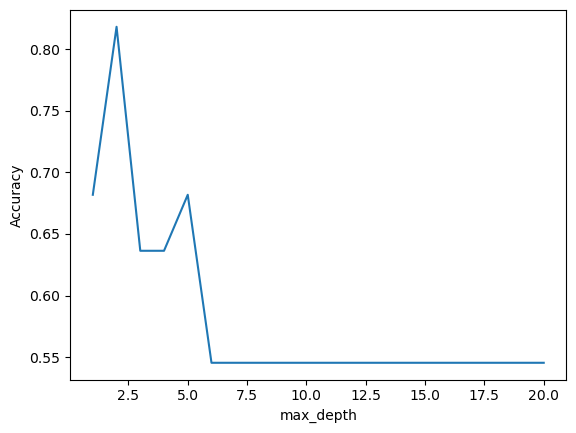

In [42]:
# Plot the accuracy of the decision tree models versus the max_depth.
plt.plot(depths, acc_depth)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

In [46]:
# Find the largest accuracy and the depth this occurs
max_acc = np.max(acc_depth)
best_depth = depths[np.argmax(acc_depth)]
print(f'Highest accuracy of {round(max_acc, 3)*100}% occurs at depth of {best_depth}.')

Highest accuracy of 81.8% occurs at depth of 2.


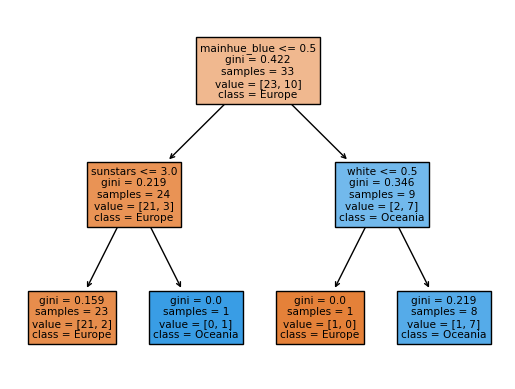

In [49]:
# Refit decision tree model with the highest accuracy and plot the decision tree
dt = DecisionTreeClassifier(random_state=1, max_depth=best_depth).fit(
    train_data, train_labels)
tree.plot_tree(dt, feature_names=train_data.columns.tolist(), 
               class_names=['Europe', 'Oceania'], filled=True)
plt.show()